<a href="https://colab.research.google.com/github/RKNahid/Automated-Sleep-Stage-Detection-using-Machine-Learning-Algorithm/blob/main/RFTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library & Reading

In [1]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project/REM_NREM.csv")
target = "Sleep_Stage"

##Level Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

##Spliting

In [5]:
x = df.loc[:,df.columns != target]
y = df[target]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

*Balance Dataset*

In [7]:
x_train, y_train = balance(x_train, y_train)

# Tunning

##N estimator

100/400 round completed......................... Accurecy: 0.9267676767676768
110/400 round completed......................... Accurecy: 0.9259259259259259
120/400 round completed......................... Accurecy: 0.9275533108866442
130/400 round completed......................... Accurecy: 0.9277216610549944
140/400 round completed......................... Accurecy: 0.9276094276094277
150/400 round completed......................... Accurecy: 0.9268799102132436
160/400 round completed......................... Accurecy: 0.9267115600448934
170/400 round completed......................... Accurecy: 0.9267115600448934
180/400 round completed......................... Accurecy: 0.9264870931537598
190/400 round completed......................... Accurecy: 0.926936026936027
200/400 round completed......................... Accurecy: 0.9272166105499439
210/400 round completed......................... Accurecy: 0.9262626262626262
220/400 round completed......................... Accurecy: 0.9271

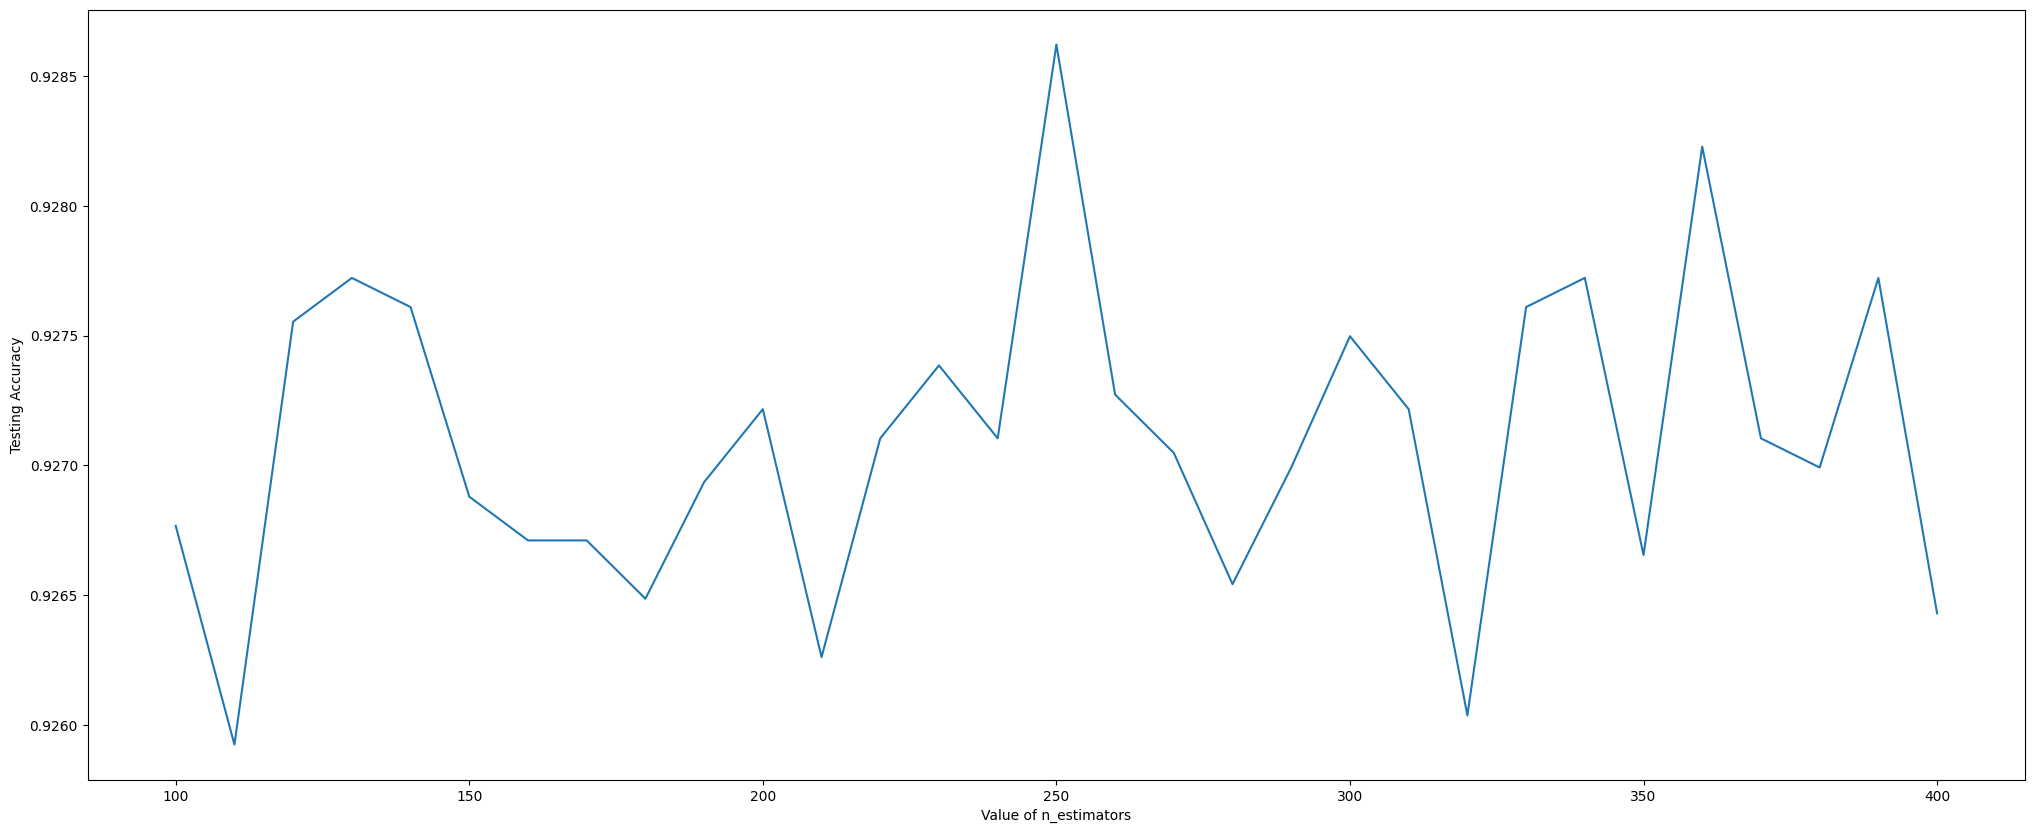

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=400
k_range = range (100,N+1,10)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)



#250

*Result for Best Estimator*

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(x_train, y_train)
y_pred=rf_estimator.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
[[13707   808]
 [  548  2757]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14515
           1       0.77      0.83      0.80      3305

    accuracy                           0.92     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.92      0.93     17820

Accurecy:  0.9239057239057239


##Max Depth

1/500 round completed......................... Accurecy: 0.7198092031425365
51/500 round completed......................... Accurecy: 0.9233445566778901
101/500 round completed......................... Accurecy: 0.9234567901234568
151/500 round completed......................... Accurecy: 0.9234567901234568
201/500 round completed......................... Accurecy: 0.9234567901234568
251/500 round completed......................... Accurecy: 0.9234567901234568
301/500 round completed......................... Accurecy: 0.9234567901234568
351/500 round completed......................... Accurecy: 0.9234567901234568
401/500 round completed......................... Accurecy: 0.9234567901234568
451/500 round completed......................... Accurecy: 0.9234567901234568
The best Depth:
101
CPU times: user 22min 43s, sys: 1.72 s, total: 22min 45s
Wall time: 13min 44s


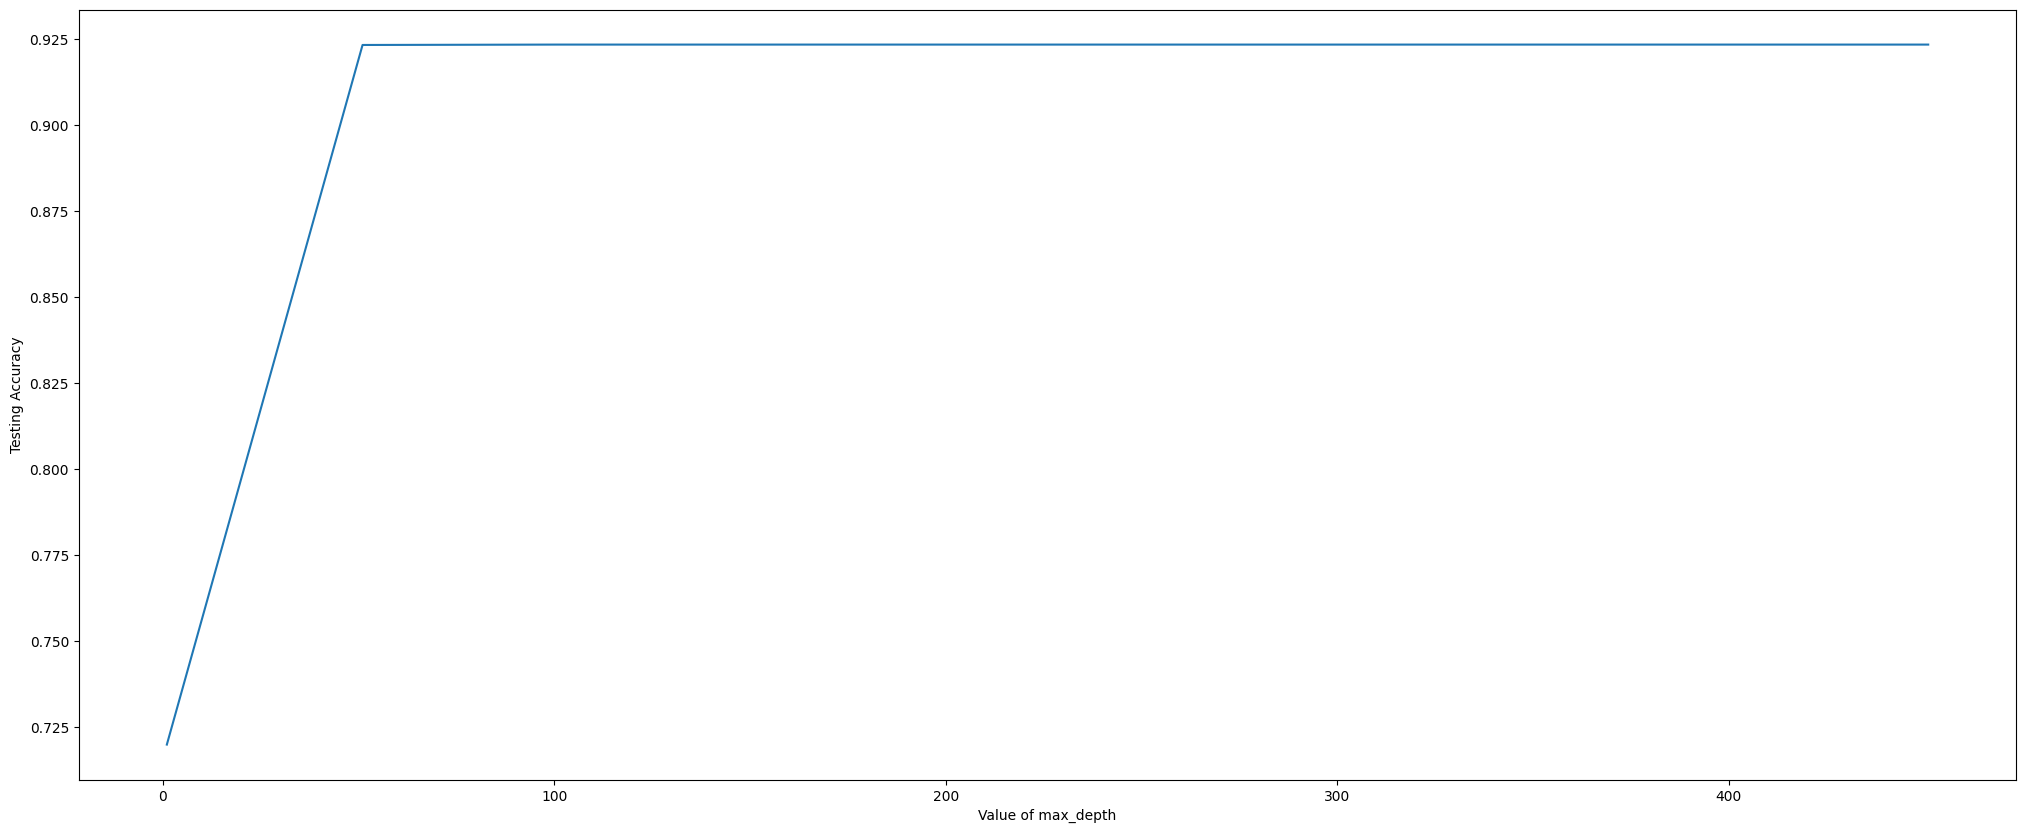

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=500
k_range = range (1,N+1,50)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)



#100

*Result for Best Depth*

In [13]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,n_jobs = -1)
rf_depth.fit(x_train, y_train)
y_pred=rf_depth.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
[[13711   810]
 [  549  2750]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14521
           1       0.77      0.83      0.80      3299

    accuracy                           0.92     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.92      0.92     17820

Accurecy:  0.9237373737373737


# Result for Full Config

In [14]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(x_train, y_train)
y_pred=rf_all.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


NameError: ignored